In [246]:
# Arjun Srivastava
# Analysis of Google's stock over the last year
# %pip install yfinance  --Install Yahoo Finance; other dependencies are already installed

import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # For data analysis
import yfinance as yf  # Yahoo Finance API
import numpy as np
%matplotlib inline

In [247]:
# Retrieving/formatting data

googl = yf.Ticker('GOOGL')  # Google's stock
hist = googl.history(period="1y")  # The one year history of GOOGL as a DataFrame

agg = {'Open'  : 'first',
         'High'  : 'max',
         'Low'   : 'min',
         'Close' : 'last',
         'Volume': 'sum'}

weekly_hist = hist.resample('W', loffset=pd.offsets.timedelta(days=-6)).apply(agg)  # Converts daily timeseries to weekly timeseries and applies aggregation logic

'\nGoogle Stock hit a low during March, but the weekly close prices have seen a\nrelatively upwards trend since then, with the yearly high recently in November.\nIn march, both Facebook and Google stock dropped during the onset of the pandemic in the US,\nso this drop may be attributed to that. Since the initial drop, however,\nGoogle seems to be doing well, with overall positive trends and a recent high.\n'

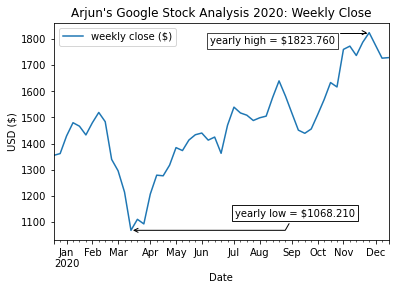

In [248]:
# Analyzing weekly close prices

fig, ax = plt.subplots(1)  # Create a figure anad a single axis

# Finding/annotating the yearly high
def find_high(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "yearly high = ${:.3f}".format(ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=60,angleB=0")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.84,0.94), **kw)
    
# Finding/annotating the yearly low
def find_low(x, y, ax=None):
    xmin = x[np.argmin(y)]
    ymin = y.min()
    text= "yearly low = ${:.3f}".format(ymin)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.9)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=60,angleB=0")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="bottom")
    ax.annotate(text, xy=(xmin, ymin), xytext=(.9, 0.1), **kw)
    
find_high(weekly_hist.index, weekly_hist['Close'], ax=ax)  # Annotate yearly high
find_low(weekly_hist.index, weekly_hist['Close'], ax=ax)  # Annotate yearly low

ax.set_title('Arjun\'s Google Stock Analysis 2020: Weekly Close')
ax.set_ylabel('USD ($)')
weekly_hist.plot(y='Close', ax=ax, label='weekly close ($)')  # Plots data with yearly high and low

# Obervations:
"""
Google Stock hit a low during March, but the weekly close prices have seen a
relatively upwards trend since then, with the yearly high recently in November.
In march, both Facebook and Google stock dropped during the onset of the pandemic in the US,
so this drop may be attributed to that. Since the initial drop, however,
Google seems to be doing well, with overall positive trends and a recent high.
"""

'\nAs I expected, using the original daily DataFrame resulted in numerous examples\nof multi-frequency close prices, as opposed to the single value in the weekly price data.\nThis is likely due to the increased variability in stock prices, since we are looking at\n7 times more data points.\n'

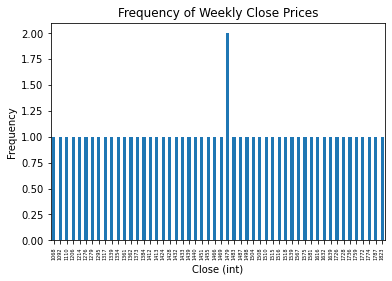

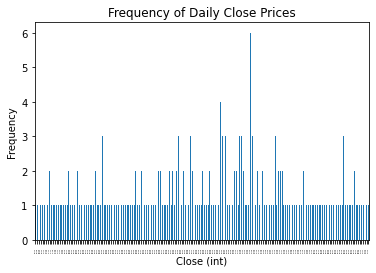

In [249]:
# Bar Graph of WEEKLY close price frequencies

weekly_hist['Close (int)'] = weekly_hist['Close'].astype(int)  # Adds column of weekly close prices cast as ints
grouped = weekly_hist['Close (int)'].groupby(weekly_hist['Close (int)']).count()  # Group by the weekly close prices' counts

fig1, ax1 = plt.subplots(1)  # Creates a figure and a single axis
ax1.set_xlabel(xlabel='Close Price ($)')
ax1.set_xticklabels(labels=weekly_hist['Close (int)'],fontsize='5')
ax1.set_title('Frequency of Weekly Close Prices')
ax1.set_ylabel(ylabel='Frequency')
grouped.plot.bar(x=grouped.index, y=grouped.values, ax=ax1)  # Plots all weekly close prices on bar graph by count

# Observations
"""
Since Google is a company with relatively expensive shares, the distribution among prices
is high and there is only one integer price which appears more than once ($1479).
As seen in the bar chart, all values of the close prices have a frequency of 1, and only
$1479 appears twice. If we were to look at the DAILY close prices, we might be able to
observe more common/higher price frequences.
"""

# Bar Graph of DAILY close price frequencices

hist['Close (int)'] = hist['Close'].astype(int)  # Adds column of daily close prices case as ints
grouped_daily = hist['Close (int)'].groupby(hist['Close (int)']).count()  # Group by the daily close prices' counts

fig2, ax2 = plt.subplots(1)  # Creates a new figure and a single axis to plot daily close prices
ax2.set_xlabel(xlabel='Close Price ($)')
ax2.set_xticklabels(labels=hist['Close (int)'],fontsize='2')
ax2.set_title('Frequency of Daily Close Prices')
ax2.set_ylabel(ylabel='Frequency')
grouped_daily.plot.bar(x=grouped_daily.index, y=grouped_daily.values, ax=ax2)  # Plots all daily close prices on bar graph by count

# Observations
"""
As I expected, using the original daily DataFrame resulted in numerous examples
of multi-frequency close prices, as opposed to the single value in the weekly price data.
This is likely due to the increased variability in stock prices, since we are looking at
7 times more data points.
"""

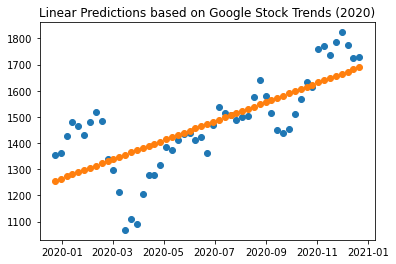

'\nThe regression trend line is positive. This conclusion gives me more of a reason to invest in Google, since the data supports\nthe notion that the stock price will continue to increase. This is a very basic model and it ignores many important factors, but it\nstill gives us more insight into the relationship between time and close prices.\n'

In [250]:
# Trend analysis
"""
Looking at the line graph depicting Google's weekly close data over the last year,
the overall trend seems to be positive. Although I believe the data from Yah to be reliable,
I would want to conduct a much more thorough analyis of the industry and of Google as a company in order
to decide whether to invest. At first glance though, and knowing Google, it is likely not a large risk to invest
in some shares.
a. I would look into Google's upcoming plans/products, their competition in the industry right now, their leadership,
    and more quantitative data to analyze more than just one single year of close prices.
b. A lot of this information can be found online and through other financial data APIs.

Something else I would do would to get a better idea of the trend would be generating regression models based on the data.
This would allow me to see an actual model that I could use to help guide my investment decision. Below I have used scikit-learn
to generate a simple regression model based on the data.
"""

# Simple linear regression to see trend
from sklearn.linear_model import LinearRegression

plt.scatter(weekly_hist.index, weekly_hist['Close'])  # Plot weekly close price data
weekly_numeric = weekly_hist.assign(date=range(len(weekly_hist)))  # Create a new DF with numeric index instead of datetime
x, y = weekly_numeric[['date']], weekly_numeric['Close']
model = LinearRegression()
model.fit(x, y)
pred = model.predict(weekly_numeric[['date']])  # Make predictions
pred_df = pd.DataFrame({'linear predictions': pred})
pred_df.index = weekly_numeric.index
weekly_numeric['linear predictions'] = pred_df  # Add new Series to weekly DataFrame
plt.scatter(weekly_hist.index, weekly_numeric['linear predictions'])  # Plot regression line
plt.title('Linear Predictions based on Google Stock Trends (2020)')
plt.show()

# Observations
"""
The regression trend line is positive. This conclusion gives me more of a reason to invest in Google, since the data supports
the notion that the stock price will continue to increase. This is a very basic model and it ignores many important factors, but it
still gives us more insight into the relationship between time and close prices.
"""